In [1]:
from math import *
import operator

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set(style="white", color_codes=True)

In [2]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

Python: 3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
scipy: 1.1.0
numpy: 1.14.2
matplotlib: 2.1.2
pandas: 0.20.3


In [3]:
location_iris = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\iris.csv"


In [4]:
df_iris = pd.read_csv(location_iris)


In [5]:
df_iris.shape

(150, 5)

In [6]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [7]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
# Now we can take a look at a summary of each attribute.

# This includes the count, mean, the min and max values as well as some 
# percentiles.
# similar ranges between 0 and 8 centimeters.
df_iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [9]:
# Class Distribution
df_iris.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [10]:
df_iris['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [11]:
df_iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Scatter plot

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


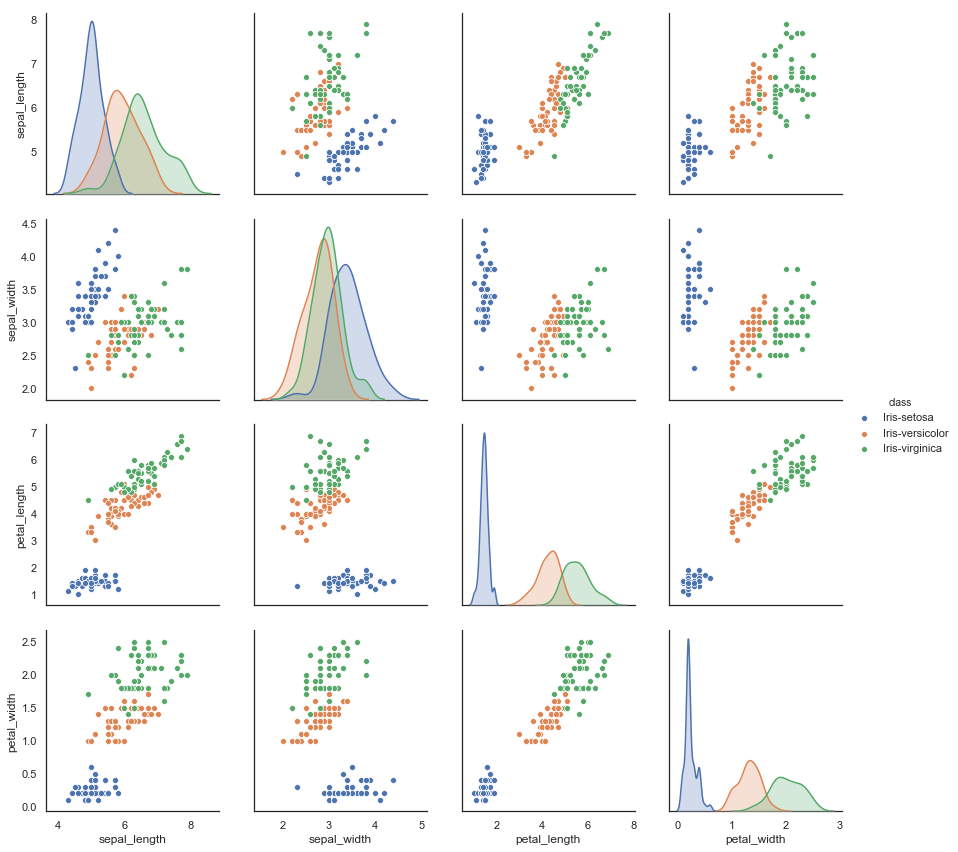

In [12]:
# seaborn plot is the pairplot, which shows the bivariate relation between 
# each # pair of features From the pairplot, 
# we'll see that the Iris-setosa species is separataed from the other two 
# across # all feature combinations 
sns.pairplot(df_iris, hue="class", size=3);

#### correlation coeff

#### Positive Correlation

In [13]:
np.random.seed(1)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Positive Correlation with some noise
y = x + np.random.normal(0, 10, 1000)

np.corrcoef(x, y)

array([[1.        , 0.81543901],
       [0.81543901, 1.        ]])

The correlation is 0.815, a strong positive correlation, let’s take a look at a scatter chart.

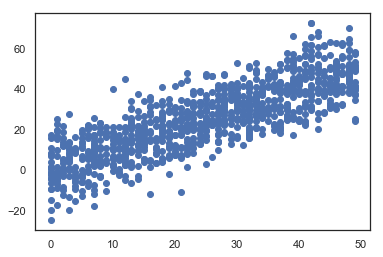

In [14]:
plt.scatter(x, y);

#### Negative Correlation

In [15]:
# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Negative Correlation with some noise
y = 100 - x + np.random.normal(0, 5, 1000)

np.corrcoef(x, y)

array([[ 1.        , -0.94957116],
       [-0.94957116,  1.        ]])

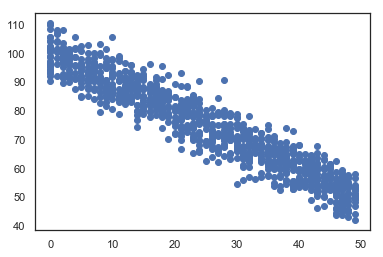

In [16]:
plt.scatter(x, y)

#### No/Weak Correlation
What if there is no correlation between x and y?

In [17]:
x = np.random.randint(0, 50, 1000)
y = np.random.randint(0, 50, 1000)
np.corrcoef(x, y)

array([[ 1.        , -0.00554681],
       [-0.00554681,  1.        ]])

Here we see a very small value for the correlation between x and y, indicating no correlation.

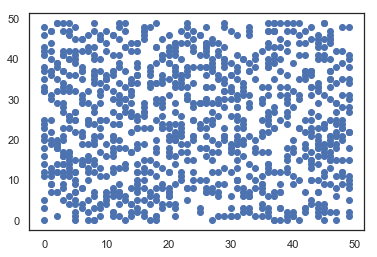

In [18]:
plt.scatter(x, y);

#### Correlation Matrix

In [19]:
df = pd.DataFrame({'Col1': np.random.randint(0, 50, 1000)})

# positively correlated with 'a'
df['Col2'] = df['Col1'] + np.random.normal(0, 10, 1000) 

# negatively correlated with 'a'
df['Col3'] = 100 - df['Col1'] + np.random.normal(0, 5, 1000) 

# not correlated with 'a'
df['Col4'] = np.random.randint(0, 50, 1000) 

In [20]:
df.shape

(1000, 4)

In [21]:
df.corr()

,Col1,Col2,Col3,Col4
Col1,1.000000,0.825361,-0.948845,0.009802
Col2,0.825361,1.000000,-0.789391,0.011852
Col3,-0.948845,-0.789391,1.000000,-0.003228
Col4,0.009802,0.011852,-0.003228,1.000000


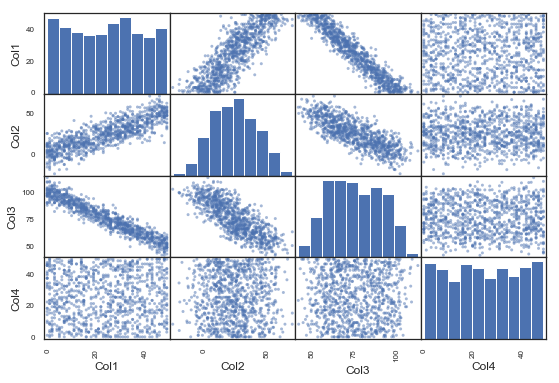

In [22]:
pd.plotting.scatter_matrix(df, figsize=(9, 6));

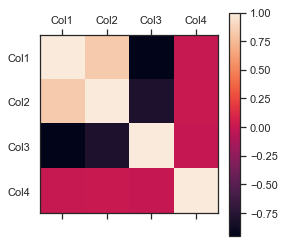

In [23]:
plt.figure(figsize=(9, 6))

plt.matshow(df.corr())

plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar();


In [24]:
# get the correlation coefficient
df_iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


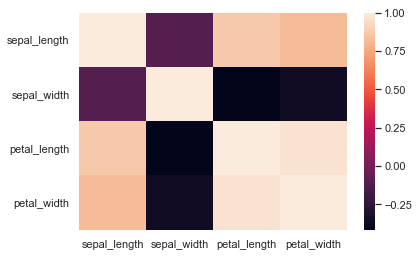

In [25]:
# Using seaborn heatmap
sns.heatmap(df_iris.corr());

#### Check correlation in 3D

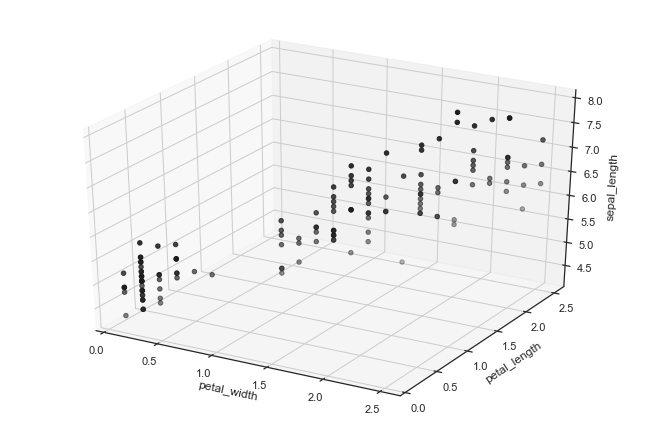

In [36]:
import itertools

colors = itertools.cycle(["k", "k", "g"])

fig = plt.figure(figsize=(9, 6))
ax  = fig.add_subplot(111, projection='3d')

X = [df_iris["petal_width"], df_iris["petal_width"], df_iris["sepal_length"]]

n = 100
ax.scatter(df_iris["petal_width"], df_iris["petal_width"], df_iris["sepal_length"], color=next(colors))


ax.set_xlabel('petal_width')
ax.set_ylabel('petal_length')
ax.set_zlabel('sepal_length')

plt.tight_layout(pad=0.5)